In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#to import first execute this command in the bash
# cp drive/MyDrive/fabric_classification/Fabric_Classification/my_utils.py .
import my_utils

In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re
import pathlib
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

path = "/content/drive/MyDrive/fabric_classification/Fabrics_adjusted"

data_dir = pathlib.Path(path)

In [ ]:
batch_size = 32
img_height = 400
img_width = 400

train_ds, val_ds, class_names = my_utils.generate_ds(data_dir, batch_size, img_height, img_width)

print(class_names)

Found 4692 files belonging to 6 classes.
Using 3754 files for training.
Found 4692 files belonging to 6 classes.
Using 938 files for validation.
['Cotton', 'Denim', 'Nylon', 'Polyester', 'Silk', 'Wool']


In [ ]:
#data augmentation based of https://keras.io/examples/vision/image_classification_from_scratch/

#the augmentations to make
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomRotation(0.5)
    ]
)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
#based of https://www.tensorflow.org/tutorials/load_data/images
num_classes = 6

norm = 0.00005
dropout_val = 0.5

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, input_shape=(32, 400, 400, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(norm)),
  tf.keras.layers.Dropout(dropout_val),
  
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

checkpoint = my_utils.generate_callback("/content/drive/MyDrive/fabric_classification/", "Model-3a-Aug-fa")

hist = model.fit(
    train_ds, 
    validation_data = val_ds, 
    epochs = 150, 
    verbose = 1, 
    callbacks = [checkpoint])

model.summary()

Epoch 1/150
118/118 [==============================] - ETA: 0s - loss: 2.0609 - accuracy: 0.5019
Epoch 1: val_accuracy improved from -inf to 0.56397, saving model to /content/drive/MyDrive/fabric_classification/Model-3a-fs.h5
118/118 [==============================] - 460s 4s/step - loss: 2.0609 - accuracy: 0.5019 - val_loss: 1.6149 - val_accuracy: 0.5640
Epoch 2/150
117/118 [============================>.] - ETA: 0s - loss: 1.5168 - accuracy: 0.5483
Epoch 2: val_accuracy did not improve from 0.56397
118/118 [==============================] - 9s 74ms/step - loss: 1.5166 - accuracy: 0.5485 - val_loss: 1.4240 - val_accuracy: 0.5608
Epoch 3/150
117/118 [============================>.] - ETA: 0s - loss: 1.4327 - accuracy: 0.5652
Epoch 3: val_accuracy did not improve from 0.56397
118/118 [==============================] - 9s 75ms/step - loss: 1.4327 - accuracy: 0.5650 - val_loss: 1.4324 - val_accuracy: 0.5320
Epoch 4/150
117/118 [============================>.] - ETA: 0s - loss: 1.4075 - ac

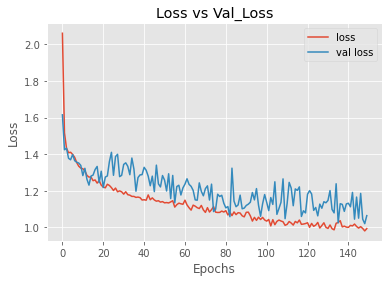

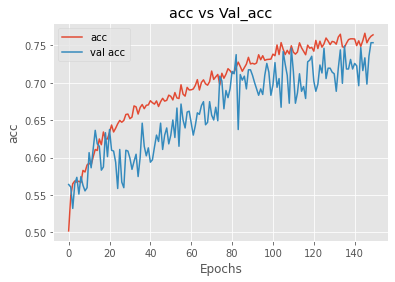

0

In [ ]:
my_utils.generate_plot(hist)

(938, 6)
[[369  26   0  36   0  14]
 [  8 120   0   0   0  10]
 [ 14   0   1  25   0   0]
 [ 18   0   0 161  14   1]
 [  0   0   0  15  25   0]
 [ 12   0   0  38   0  31]]


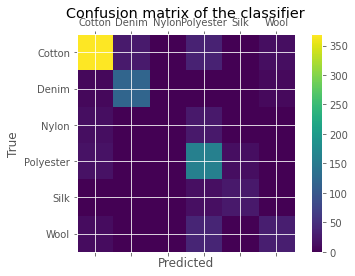

0

In [ ]:
my_utils.generate_cm(model, val_ds, class_names)